## MACHINE LEARNING MODELS



In [3]:
# Load the necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'processed_data2.csv'
df = pd.read_csv(file_path)

## Display basic info about the dataset
#df.info()
print(df.head())

# Display a sample of the text data
print("Sample Text Data:", df['cleaned_comment'].head())


                                                text  labels  \
0  <user> thanks for showing up for our appointme...       1   
1                                      haha .  # lol       1   
2  i love waiting <num> min for a cab - such shor...       1   
3  22 super funny quotes # funnyquotes  # funnysa...       1   
4            goog morning  # sorrynotsorry # morning       1   

                                     cleaned_comment  
0              user thanks showing appointment today  
1                                           haha lol  
2  love waiting num min cab shortage user please ...  
3  22 super funny quote funnyquotes funnysayings ...  
4                 goog morning sorrynotsorry morning  
Sample Text Data: 0                user thanks showing appointment today
1                                             haha lol
2    love waiting num min cab shortage user please ...
3    22 super funny quote funnyquotes funnysayings ...
4                   goog morning sorrynotsorry 

## Class Distribution

It analyzes the distribution of different classes (or labels) in the dataset. It calculates the percentage of each class and visualizes it using a pie chart.



**Calculating Class Distribution:**
 counts each label appears in the 'labels' column of the dataframe df and calculates the percentage.

**Plotting as Pie Chart:**
 creates a pie chart where each slice represents a class, showing its percentage and count.

labels
0    0.568111
1    0.431889
Name: proportion, dtype: float64


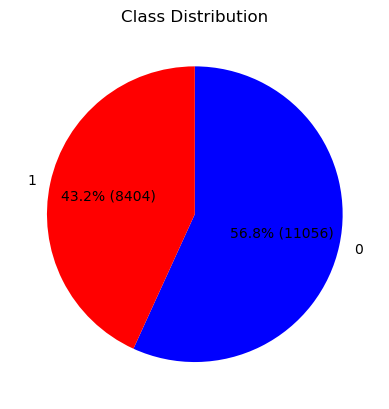

In [4]:
# Examine class distribution
label_counts = df['labels'].value_counts(normalize=True)
print(label_counts)

# Plot class distribution as a pie chart
label_counts.plot.pie(autopct=lambda pct: f'{pct:.1f}% ({int(pct * len(df) / 100)})', colors=['blue', 'red'], startangle=90, counterclock=False)
plt.title('Class Distribution')
plt.ylabel('')
plt.show()


## Vectorize Text Data

It prepares textual data for machine learning models by converting it into numerical form using TF-IDF (Term Frequency-Inverse Document Frequency).


**Handling Missing Values:**
 fillna('') fills any missing comments with an empty string.

**Vectorization:**
 I used the TF-IDF vectorizer.
features_vectorized = tfidf.fit_transform(features) transforms the 'cleaned_comment' text data into a numerical matrix using TF-IDF.

DataFrame Creation:

features_df = pd.DataFrame(features_vectorized.toarray(), columns=tfidf.get_feature_names_out()) converts the TF-IDF matrix into a pandas DataFramores:

get_significant_tfidf_scores() is a function that identifies terms with high TF-IDF scores, indicating their importance in distinguishing classes.
A sample of features_df is taken (sample_df) and significant TF-IDF scores are computed and added as significant_tfidf column.

In [5]:
# Replace NaNs with an empty string
df['cleaned_comment'] = df['cleaned_comment'].fillna('')

# Separate features and labels
features = df['cleaned_comment']
labels = df['labels']

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer()
features_vectorized = tfidf.fit_transform(features)

# Convert the vectorized data to a DataFrame
features_df = pd.DataFrame(features_vectorized.toarray(), columns=tfidf.get_feature_names_out())

# Add the original comments and labels to the DataFrame
features_df['original_comment'] = features.values
features_df['label'] = labels.values

# Function to get significant TF-IDF scores
def get_significant_tfidf_scores(row, terms, threshold=0.1):
    """ Get terms with TF-IDF scores above the threshold. """
    significant_terms = {terms[i]: row[i] for i in range(len(row)) if row[i] > threshold}
    return significant_terms

# Display a sample of the combined data with significant TF-IDF scores
sample_df = features_df.sample(5)  # Sample 5 random rows

# Add significant TF-IDF scores to the sample data
sample_df['significant_tfidf'] = sample_df.drop(columns=['original_comment', 'label']).apply(
    lambda row: get_significant_tfidf_scores(row, tfidf.get_feature_names_out()), axis=1
)

# Select only the relevant columns to display
display_df = sample_df[['original_comment', 'label', 'significant_tfidf']]

print("Sample DataFrame with Original Comments and Significant TF-IDF Scores:\n", display_df)


C:\Users\91636\AppData\Local\Temp\ipykernel_25072\762510879.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  significant_terms = {terms[i]: row[i] for i in range(len(row)) if row[i] > threshold}


Sample DataFrame with Original Comments and Significant TF-IDF Scores:
                                    original_comment  label  \
11525             beautiful night user addict owner      0   
18098                                  fox dailyfox      0   
9731                            sidewalk saved life      0   
18052                      wise word lmao wisewords      1   
3417   graham six grape reserve porto cherry garcia      1   

                                       significant_tfidf  
11525  {'addict': 0.6654870861412011, 'beautiful': 0....  
18098  {'dailyfox': 0.7604665514739389, 'fox': 0.6493...  
9731   {'lieutenant': 0.3939119190693158, 'savebees':...  
18052  {'lm': 0.44235563389323745, 'wisdomwednesday':...  
3417   {'cherry': 0.3709213218273487, 'garcia': 0.391...  


## Split Data into Training and Testing Sets
To divide the dataset into training and testing subsets for evaluating machine learning models.

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_vectorized, labels, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")



Training data shape: (15568, 27748), Training labels shape: (15568,)
Testing data shape: (3893, 27748), Testing labels shape: (3893,)


## Logistic Regression Model

To train a logistic regression model using the training data and evaluate its performance.

LogisticRegression() initializes a logistic regression model.
log_reg.fit(X_train, y_train) trains the model using the training data.
log_reg.predict(X_test) predicts labels for the test data.
Evaluation metrics (classification_report and accuracy_score) assess the model's performance.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80      2182
           1       0.80      0.59      0.68      1711

    accuracy                           0.75      3893
   macro avg       0.77      0.74      0.74      3893
weighted avg       0.76      0.75      0.75      3893

Logistic Regression Accuracy: 0.754687901361418


## Random Forest Classifier

To train a random forest classifier using the training data and evaluate its performance.

RandomForestClassifier() initializes a random forest classifier.
rf_clf.fit(X_train, y_train) trains the model.
rf_clf.predict(X_test) predicts labels for the test data.
Performance metrics (classification_report and accuracy_score) evaluate the model's effectiveness.

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.87      0.79      2182
           1       0.77      0.55      0.65      1711

    accuracy                           0.73      3893
   macro avg       0.74      0.71      0.72      3893
weighted avg       0.74      0.73      0.72      3893

Random Forest Accuracy: 0.7325969689185718


## Support Vector Machine (SVM)

To train a support vector machine (SVM) classifier using the training data and evaluate its performance.

SVC() initializes an SVM classifier.
svm_clf.fit(X_train, y_train) trains the SVM model.
svm_clf.predict(X_test) predicts labels for the test data.
Evaluation metrics (classification_report and accuracy_score) assess the model's performance.

In [9]:
from sklearn.svm import SVC

# Train SVM model
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.90      0.81      2182
           1       0.81      0.58      0.68      1711

    accuracy                           0.76      3893
   macro avg       0.77      0.74      0.74      3893
weighted avg       0.77      0.76      0.75      3893

SVM Accuracy: 0.7577703570511174


In [10]:
# Summary of Results
print("Summary of Model Performance:")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
 

Summary of Model Performance:
Logistic Regression Accuracy: 0.754687901361418
Random Forest Accuracy: 0.7325969689185718
SVM Accuracy: 0.7577703570511174


### compare the performance of different models trained on the dataset.